In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, SequentialFeatureSelector, RFECV, f_classif, mutual_info_classif
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import VotingClassifier

In [2]:
%store -r df_2
%store -r y_train_mc
%store -r X_val_mc
%store -r y_val_mc
%store -r test
%store -r metric_features
%store -r non_metric_features

In [3]:
X_train = df_2
y_train = y_train_mc
X_val = X_val_mc
y_val = y_val_mc
test = test

In [4]:
categorical = X_train.select_dtypes(include=['category','bool','object']).columns
categorical

Index(['is_male', 'has_insurance', 'admission_type', 'medical_specialty',
       'healthy_heartrate', 'discharged_home', 'admission_source',
       'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'metformin', 'insulin',
       'prescribed_diabetes_meds', 'is_inpatient', 'race_AfricanAmerican',
       'race_Caucasian', 'race_Hispanic', 'race_Other'],
      dtype='object')

In [5]:
numerical = X_train.select_dtypes(exclude=['category', 'bool', 'object']).columns
numerical

Index(['age', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'number_diagnoses', 'num_medication', 'total_visits_previous_year',
       'total_tests', 'visit_count'],
      dtype='object')

# Encoding Categorical Features

## Frequency Encoding - Medical Specialty 

It is a better approach than one hot encoding since we have a lot of categories, and using it would increase data sparcity. Label encoder wouldn 't be a good approach too since there isn't any hierarchial order in the medical specialty labels. So the best approach in this variable is frequency encoder, specially because we have imbalanced data (some categories have a great difference in frequency in relation to others).

In [6]:
freq_encod_ms = (X_train.groupby('medical_specialty').size()) / len(X_train)
X_train['medical_specialty'] = X_train['medical_specialty'].apply(lambda x : freq_encod_ms[x])

X_val['medical_specialty'] = X_val['medical_specialty'].apply(lambda x : freq_encod_ms[x])
test['medical_specialty'] = test['medical_specialty'].apply(lambda x : freq_encod_ms[x])

# X_train['medical_specialty'] = X_train['medical_specialty'].astype('category')
# X_val['medical_specialty'] = X_val['medical_specialty'].astype('category')
# test['medical_specialty'] = test['medical_specialty'].astype('category')

## Label Encoding - Admission Type
https://www.england.nhs.uk/statistics/wp-content/uploads/sites/2/2013/04/QAR-commentary-Q1-1617-53636.pdf

Number of patients admitted electively during the quarter. Admissions are split into two 
types, elective and non-elective. Non-elective admissions are emergency admissions an 
elective admissions include all other types.

In [7]:
X_train['admission_type'] = X_train['admission_type'].map({'Emergency': 2, 'Elective': 1, 'Urgent':1})
#X_train['admission_type'] = X_train['admission_type'].astype(int)

X_val['admission_type'] = X_val['admission_type'].map({'Emergency': 2, 'Elective': 1, 'Urgent':1})
#X_val['admission_type'] = X_val['admission_type'].astype(int)

test['admission_type'] = test['admission_type'].map({'Emergency': 2, 'Elective': 1, 'Urgent':1})
#test['admission_type'] = test['admission_type'].astype(int)

## Frequency Encoding - Admission Source

In [8]:
freq_encod_as = (X_train.groupby('admission_source').size()) / len(X_train)
X_train['admission_source'] = X_train['admission_source'].apply(lambda x : freq_encod_as[x])

X_val['admission_source'] = X_val['admission_source'].apply(lambda x : freq_encod_as[x])
test['admission_source'] = test['admission_source'].apply(lambda x : freq_encod_as[x])

# X_train['admission_source'] = X_train['admission_source'].astype('category')
# X_val['admission_source'] = X_val['admission_source'].astype('category')
# test['admission_source'] = test['admission_source'].astype('category')

## Frequency Encoding - Discharge Disposition

we use discharged_home!!

In [9]:

# freq_encod_as = (X_train.groupby('discharge_disposition').size()) / len(X_train)
# X_train['discharge_disposition'] = X_train['discharge_disposition'].apply(lambda x : freq_encod_as[x])

# X_val['discharge_disposition'] = X_val['discharge_disposition'].apply(lambda x : freq_encod_as[x])
# test['discharge_disposition'] = test['discharge_disposition'].apply(lambda x : freq_encod_as[x])

# # X_train['discharge_disposition'] = X_train['discharge_disposition'].astype('category')
# # X_val['discharge_disposition'] = X_val['discharge_disposition'].astype('category')
# # test['discharge_disposition'] = test['discharge_disposition'].astype('category')

## Frequency Encoding - A1c test

we use Label/Ordinal Encoder

In [10]:

# freq_encod_a1c = (X_train.groupby('a1c_test_result').size()) / len(X_train)
# X_train['a1c_test_result'] = X_train['a1c_test_result'].apply(lambda x : freq_encod_a1c[x])


# X_val['a1c_test_result'] = X_val['a1c_test_result'].apply(lambda x : freq_encod_a1c[x])
# test['a1c_test_result'] = test['a1c_test_result'].apply(lambda x : freq_encod_a1c[x])

# # X_train['a1c_test_result'] = X_train['a1c_test_result'].astype('category')
# # X_val['a1c_test_result'] = X_val['a1c_test_result'].astype('category')
# # test['a1c_test_result'] = test['a1c_test_result'].astype('category')

In [11]:
#freq_encod_a1c

## Frequency Encoding - Glucose test

we use Label/Ordinal Encoder

In [12]:
X_train.glucose_test_result.value_counts()

glucose_test_result
0    52298
2     1452
1     1397
Name: count, dtype: int64

In [13]:
# freq_encod_g = (X_train.groupby('glucose_test_result').size()) / len(X_train)
# X_train['glucose_test_result'] = X_train['glucose_test_result'].apply(lambda x : freq_encod_g[x])

# X_val['glucose_test_result'] = X_val['glucose_test_result'].apply(lambda x : freq_encod_g[x])
# test['glucose_test_result'] = test['glucose_test_result'].apply(lambda x : freq_encod_g[x])

# # X_train['glucose_test_result'] = X_train['glucose_test_result'].astype('category')
# # X_val['glucose_test_result'] = X_val['glucose_test_result'].astype('category')
# # test['glucose_test_result'] = test['glucose_test_result'].astype('category')

## Frequency Encoding - Primary Diagnosis

In [14]:
freq_encod_pd = (X_train.groupby('primary_diagnosis').size()) / len(X_train)
X_train['primary_diagnosis'] = X_train['primary_diagnosis'].apply(lambda x : freq_encod_pd[x])

X_val['primary_diagnosis'] = X_val['primary_diagnosis'].apply(lambda x : freq_encod_pd[x])
test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x : freq_encod_pd[x])

# X_train['primary_diagnosis'] = X_train['primary_diagnosis'].astype('category')
# X_val['primary_diagnosis'] = X_val['primary_diagnosis'].astype('category')
# test['primary_diagnosis'] = test['primary_diagnosis'].astype('category')

## Frequency Encoding - Secondary Diagnosis

In [15]:
freq_encod_sd = (X_train.groupby('secondary_diagnosis').size()) / len(X_train)
X_train['secondary_diagnosis'] = X_train['secondary_diagnosis'].apply(lambda x : freq_encod_sd[x])

X_val['secondary_diagnosis'] = X_val['secondary_diagnosis'].apply(lambda x : freq_encod_sd[x])
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x : freq_encod_sd[x])

# X_train['secondary_diagnosis'] = X_train['secondary_diagnosis'].astype('category')
# X_val['secondary_diagnosis'] = X_val['secondary_diagnosis'].astype('category')
# test['secondary_diagnosis'] = test['secondary_diagnosis'].astype('category')


## Frequency Encoding - Additional Diagnosis

In [16]:
freq_encod_ad = (X_train.groupby('additional_diagnosis').size()) / len(X_train)
X_train['additional_diagnosis'] = X_train['additional_diagnosis'].apply(lambda x : freq_encod_ad[x])

X_val['additional_diagnosis'] = X_val['additional_diagnosis'].apply(lambda x : freq_encod_ad[x])
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x : freq_encod_ad[x])

# X_train['additional_diagnosis'] = X_train['additional_diagnosis'].astype('category')
# X_val['additional_diagnosis'] = X_val['additional_diagnosis'].astype('category')
# test['additional_diagnosis'] = test['additional_diagnosis'].astype('category')

# Balance Data

- https://towardsdatascience.com/how-to-handle-multiclass-imbalanced-data-say-no-to-smote-e9a7f393c310
- https://medium.com/@ravi.abhinav4/improving-class-imbalance-with-class-weights-in-machine-learning-af072fdd4aa4

In the multiclass problem we will use Class Weight (2 manual ways to apply class weight and through the definition of class_weight='balanced' in the predictive models), SMOTE and RandomUndersampling to deal with imbalanced data. We will try to use this 5 different approaches in order to try to maximize our results. The first 3 approaches will only be applied to the algorithms who possess a parameter class_weight.

### METHOD 1: WEIGHT THROUGH CLASS PROPORTION

In [17]:
#weights = y_train.value_counts()/len(X_train)
#weights

In [18]:
#weights={0:0.536875,1:0.112204,2:0.350921}

This approach uses the value_counts() function to count the occurrences of each class in the target variable y_train. It then divides these counts by the total number of samples (len(X_train)) to obtain class weights. This approach directly computes the proportion of each class in the dataset.

### METHOD 2: NORMALIZED WEIGHTS

In [19]:
'''import numpy as np

def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (len(unique_classes) * class_count)
        class_weights[class_label] = class_weight

    return class_weights

# Assuming 'y' contains the class labels for the multiclass problem
weights2 = calculate_class_weights(y_train)'''


"import numpy as np\n\ndef calculate_class_weights(y):\n    unique_classes, class_counts = np.unique(y, return_counts=True)\n    total_samples = len(y)\n    class_weights = {}\n\n    for class_label, class_count in zip(unique_classes, class_counts):\n        class_weight = total_samples / (len(unique_classes) * class_count)\n        class_weights[class_label] = class_weight\n\n    return class_weights\n\n# Assuming 'y' contains the class labels for the multiclass problem\nweights2 = calculate_class_weights(y_train)"

In [20]:
#weights2

This function calculates class weights by taking the total number of samples and dividing it by the product of the number of unique classes and the count of each specific class. It aims to distribute the weights more evenly across multiple classes in a multiclass problem.

This approach normalizes the weights based on the total number of samples and the count of each class, aiming for balanced weights across all classes in a multiclass problem.

### METHOD 3: Built-in class weight parameter

This method will be applied further away, in the prediction section since it envolves only the change in the parameter 'class_weight'. It has the of being a convenient option that automatically adjusts class weights based on class frequencies. 

### METHOD 4: SMOTE

In [21]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

### METHOD 5: Random UnderSampling

In [22]:
'''under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42) 
X_train, y_train = under_sampler.fit_resample(X_train, y_train)'''

"under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=42) \nX_train, y_train = under_sampler.fit_resample(X_train, y_train)"

# Assessing Relationships between Categorical Variables
## Feature Selection

### Chi2 - Test Independence (Categorical variable x target)

Independence between a single categorical predictor variable and the binary target variable

In [24]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in X_train[categorical]:
    TestIndependence(X_train[categorical][var],y_train.values.ravel(), var) #so that y_train is 1-D

is_male is IMPORTANT for Prediction
has_insurance is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
medical_specialty is IMPORTANT for Prediction
healthy_heartrate is IMPORTANT for Prediction
discharged_home is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
change_in_meds_during_hospitalization is IMPORTANT for Prediction
metformin is IMPORTANT for Prediction
insulin is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
is_inpatient is IMPORTANT for Prediction
race_AfricanAmerican is IMPORTANT for Prediction
race_Caucasian is IMPORTANT for Prediction
race_Hispanic is IMPORTANT for Prediction
race_Other is IMPORTANT for Prediction
critical_amount_of_diagnoses is IMPORTANT for Prediction
critical_amount_of_visits_this_year is IMPORTANT for Prediction


### Chi2 - Test Independence (Categorical variable x Categorical variable)

Independence between every categorical variables

In [25]:
def TestIndependenceForAll(cat, alpha=0.05):
    results = {}

    for i in range(len(cat.columns)):
        for j in range(i + 1, len(cat.columns)):
            var1 = cat.columns[i]
            var2 = cat.columns[j]

            # Perform chi-squared test for independence
            contingency_table = pd.crosstab(cat[var1], cat[var2])
            chi2, p, _, _ = stats.chi2_contingency(contingency_table)

            # Record the result
            if p < alpha:
                result = "DEPENDENT"
            else:
                result = "INDEPENDENT"

            results[(var1, var2)] = result

    return results

results = TestIndependenceForAll(X_train[categorical])
for (var1, var2), result in results.items():
    if result == 'DEPENDENT':
        print(f'({var1}, {var2}): {result}')

(is_male, has_insurance): DEPENDENT
(is_male, admission_type): DEPENDENT
(is_male, healthy_heartrate): DEPENDENT
(is_male, discharged_home): DEPENDENT
(is_male, primary_diagnosis): DEPENDENT
(is_male, change_in_meds_during_hospitalization): DEPENDENT
(is_male, metformin): DEPENDENT
(is_male, insulin): DEPENDENT
(is_male, prescribed_diabetes_meds): DEPENDENT
(is_male, is_inpatient): DEPENDENT
(is_male, race_AfricanAmerican): DEPENDENT
(is_male, race_Caucasian): DEPENDENT
(is_male, race_Hispanic): DEPENDENT
(is_male, race_Other): DEPENDENT
(is_male, critical_amount_of_diagnoses): DEPENDENT
(is_male, critical_amount_of_visits_this_year): DEPENDENT
(has_insurance, admission_type): DEPENDENT
(has_insurance, medical_specialty): DEPENDENT
(has_insurance, healthy_heartrate): DEPENDENT
(has_insurance, discharged_home): DEPENDENT
(has_insurance, change_in_meds_during_hospitalization): DEPENDENT
(has_insurance, metformin): DEPENDENT
(has_insurance, insulin): DEPENDENT
(has_insurance, prescribed_d

### Cramer's V 

Cramér’s V is an effect size measurement for the chi-square test of independence. It measures how strongly two categorical fields are associated.

If two variables have a high Cramér's V value, it suggests a strong association between them. In some cases, this may indicate redundancy, and you might consider dropping one of the variables to simplify your model. <br>

https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-cramrs-v

ES - Effect Size

ES ≤ 0.2	The result is weak. Although the result is statistically significant, the fields are only weakly associated. <br>
0.2 < ES ≤ 0.6	The result is moderate. The fields are moderately associated. <br>
ES > 0.6	The result is strong. The fields are strongly associated. <br>

#### ES <= 0.2

In [23]:
def calculate_cramers_v_pair(cat_var1, cat_var2):
    contingency_table = pd.crosstab(X_train[cat_var1], X_train[cat_var2])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))

'''# Calculate Cramér's V for each pair of categorical variables
for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cat_var1 = categorical[i]
        cat_var2 = categorical[j]
        
        v = round(calculate_cramers_v_pair(cat_var1, cat_var2), 5)
        if v <= 0.2:  # threshold
            print(f"Cramér's V between {cat_var1} and {cat_var2}: {v}")'''

'# Calculate Cramér\'s V for each pair of categorical variables\nfor i in range(len(categorical)):\n    for j in range(i+1, len(categorical)):\n        cat_var1 = categorical[i]\n        cat_var2 = categorical[j]\n        \n        v = round(calculate_cramers_v_pair(cat_var1, cat_var2), 5)\n        if v <= 0.2:  # threshold\n            print(f"Cramér\'s V between {cat_var1} and {cat_var2}: {v}")'

#### 0.2 < ES <= 0.6

In [ ]:
'''for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cat_var1 = categorical[i]
        cat_var2 = categorical[j]
        
        v = round(calculate_cramers_v_pair(cat_var1, cat_var2), 5)
        if v > 0.2 and v <= 0.6:  # threshold
            print(f"Cramér's V between {cat_var1} and {cat_var2}: {v}")'''

#### ES > 0.6

In [24]:
for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cat_var1 = categorical[i]
        cat_var2 = categorical[j]
        
        v = round(calculate_cramers_v_pair(cat_var1, cat_var2), 5)
        if v > 0.6:  # threshold
            print(f"Cramér's V between {cat_var1} and {cat_var2}: {v}")

Cramér's V between admission_type and admission_source: 0.75102
Cramér's V between admission_type and primary_diagnosis: 0.61639
Cramér's V between medical_specialty and admission_source: 0.74402
Cramér's V between medical_specialty and primary_diagnosis: 0.90466
Cramér's V between medical_specialty and secondary_diagnosis: 0.89955
Cramér's V between medical_specialty and additional_diagnosis: 0.89885
Cramér's V between admission_source and primary_diagnosis: 0.90999
Cramér's V between admission_source and secondary_diagnosis: 0.89816
Cramér's V between admission_source and additional_diagnosis: 0.89681
Cramér's V between primary_diagnosis and secondary_diagnosis: 0.91608
Cramér's V between primary_diagnosis and additional_diagnosis: 0.9088
Cramér's V between primary_diagnosis and metformin: 0.60479
Cramér's V between primary_diagnosis and race_AfricanAmerican: 0.61731
Cramér's V between primary_diagnosis and race_Hispanic: 0.63773
Cramér's V between secondary_diagnosis and additional_

------------------------------------
admission_type and admission_source: 0.75102<br>
medical_specialty and admission_source: 0.74402<br>
medical_specialty and primary_diagnosis: 0.90466<br> medical_specialty and secondary_diagnosis: 0.8995<br>5n medical_specialty and additional_diagnosis: 0.898<br>8en admission_source and primary_diagnosis: 0.90<br>9een admission_source and secondary_diagnosis: 0.8<br>9ween admission_source and additional_diagnosis: 0.<br>8tween primary_diagnosis and secondary_diagnosis: 0<br>.etween primary_diagnosis and additional_diagnosis:<br> secondary_diagnosis and additional_diagnosis: 0.90743<br>0.9088

medical_speacialty,admission_source, additional_diagnosis, secondary_diagnosis<br>onn<br>

------------------------------------


### ANOVA (Analysis of Variance) -> Categorical x Numerical

In [ ]:
'''df = pd.concat([X_train, y_train], axis=1)

anova_results = []

for num_var in numerical:
    for cat_var in categorical:
        formula = f"{num_var} ~ C({cat_var})"
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_results.append({
            'Numerical Variable': num_var,
            'Categorical Variable': cat_var,
            'F-Statistic': anova_table['F'][0],
            'P-Value': anova_table['PR(>F)'][0]
        })

anova_df = pd.DataFrame(anova_results)
anova_df'''

In [ ]:
'''# groups with significant differences 
# H0​: there are no significant differences among the group means (it states that all population group means are equal)
filtered_results = anova_df[(anova_df['F-Statistic'] > 10) & (anova_df['P-Value'] < 0.05)]
filtered_results'''


In [23]:
def drop_features(df):

    df.drop('medical_specialty', axis = 1, inplace=True)
    df.drop('admission_source', axis = 1, inplace=True)
    df.drop('additional_diagnosis', axis = 1, inplace=True)
    df.drop('secondary_diagnosis', axis = 1, inplace=True)
    

drop_features(X_train)
drop_features(X_val)
drop_features(test)

## Data Scaling - only on numerical features

### MinMax

In [68]:
# scaler = MinMaxScaler()
# mmdf = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(mmdf, columns = X_train.columns).set_index(X_train.index)
# X_train.head()

In [69]:
# mmdf_val = scaler.fit_transform(X_val)
# X_val = pd.DataFrame(mmdf_val, columns = X_val.columns).set_index(X_val.index)

In [70]:
# mmdf_test = scaler.fit_transform(test)
# test = pd.DataFrame(mmdf_test, columns = test.columns).set_index(test.index)

In [24]:
scaler = MinMaxScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_val[numerical] = scaler.fit_transform(X_val[numerical])
test[numerical] = scaler.fit_transform(test[numerical])

### Standard

In [381]:
# scaler = StandardScaler()

# X_train[numerical] = scaler.fit_transform(X_train[numerical])
# X_val[numerical] = scaler.fit_transform(X_val[numerical])
# test[numerical] = scaler.fit_transform(test[numerical])

# Assessing Relationships between Numerical Variable x Numerical Variable
## Feature Selection

### Pearson Correlation

https://www.analyticsvidhya.com/blog/2021/03/comparison-of-pearson-and-spearman-correlation-coefficients/

para explicar

In [26]:
correlation_matrix = X_train[numerical].corr()

# Find pairs of variables with a correlation greater than 0.65
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.65:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
# Display the pairs of variables with high correlation
for pair in high_correlation_pairs:
    correlation_value = correlation_matrix.loc[pair[0], pair[1]]
    print(f"High Correlation: {pair[0]} and {pair[1]} - Correlation: {correlation_value}")


High Correlation: inpatient_visits_in_previous_year and total_visits_previous_year - Correlation: 0.808979232598975
High Correlation: number_lab_tests and total_tests - Correlation: 0.9964835318547779


### Spearman Correlation

In [27]:
correlation_matrix = X_train[numerical].corr(method='spearman')

# Find pairs of variables with a correlation greater than 0.65
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.65:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))
# Display the pairs of variables with high correlation
for pair in high_correlation_pairs:
    correlation_value = correlation_matrix.loc[pair[0], pair[1]]
    print(f"High Correlation: {pair[0]} and {pair[1]} - Correlation: {correlation_value}")


High Correlation: inpatient_visits_in_previous_year and total_visits_previous_year - Correlation: 0.8169829315760835
High Correlation: number_lab_tests and total_tests - Correlation: 0.9957961258714809


This variables will be considered as non correlatated to the target and so they are going to be dropped.

Crossing the outputs of the above methods we will drop the following columns: total_visits_previous_year,total_tests,is_male, admission_type, healthy_heartrate, race_AfricanAmerican,race_Asian,race_Hispanic.

In [25]:
def drop_features(df):
    
    df.drop('total_visits_previous_year', axis = 1, inplace=True)
    df.drop('total_tests', axis = 1, inplace=True)
  

drop_features(X_train)
drop_features(X_val)
drop_features(test)

## Wrapper

### Decision Tree Method

In [29]:
gini_importance = DecisionTreeClassifier().fit(X_train, y_train).feature_importances_

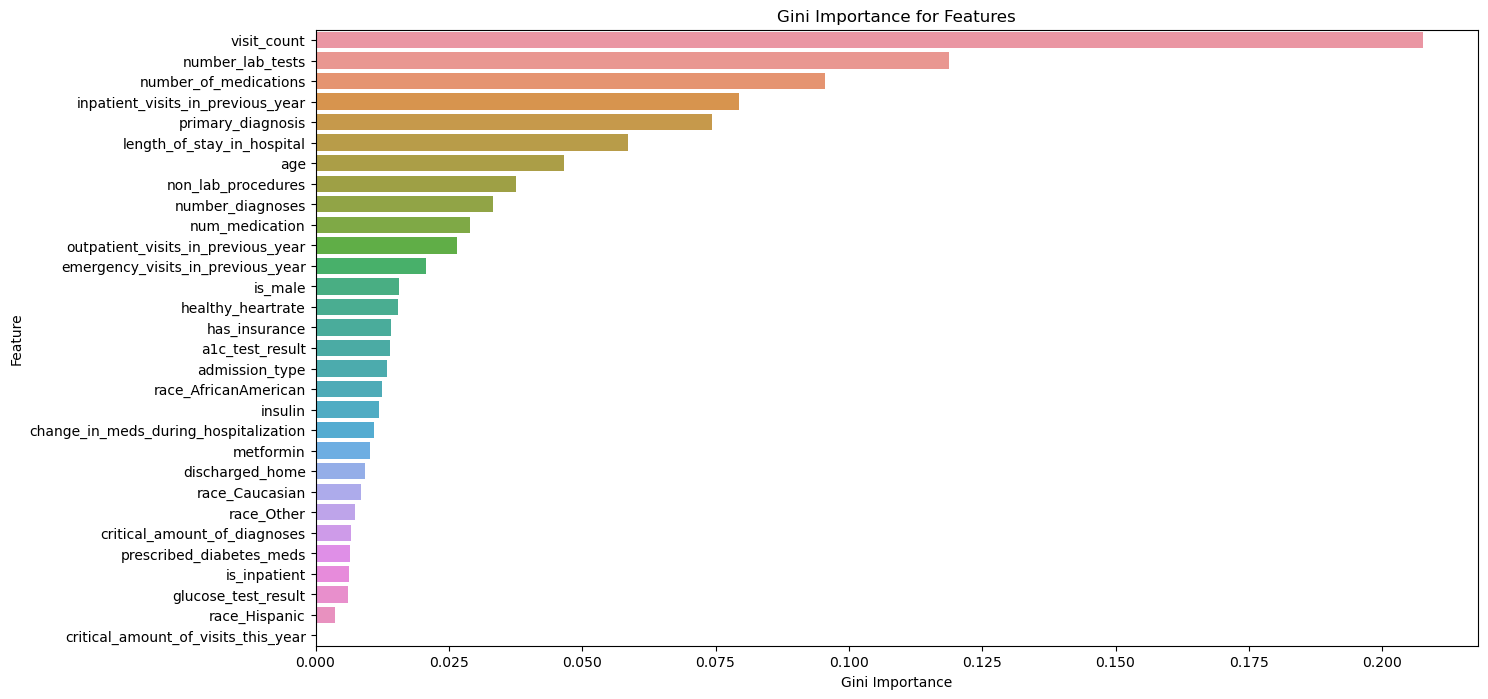

In [30]:
zippy = pd.DataFrame(zip(gini_importance), columns=['gini'])
zippy['col'] = X_train.columns
tidy = zippy.melt(id_vars='col').rename(columns={'col': 'Variable', 'value': 'Value'})

tidy.sort_values(['Value'], ascending=False, inplace=True)

plt.figure(figsize=(15, 8))
sns.barplot(y='Variable', x='Value', data=tidy)
plt.title('Gini Importance for Features')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.show()

https://datascience.stackexchange.com/questions/116549/decision-tree-vs-logistic-regression-feature-importances

Para explicar

### KBest (Mutual Information)

In [35]:
X_train.columns

Index(['is_male', 'age', 'has_insurance', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'healthy_heartrate', 'discharged_home', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds_during_hospitalization',
       'num_medication', 'metformin', 'insulin', 'prescribed_diabetes_meds',
       'is_inpatient', 'race_AfricanAmerican', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'visit_count',
       'critical_amount_of_diagnoses', 'critical_amount_of_visits_this_year'],
      dtype='object')

### Gradient Boosting 

In [36]:
gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train.values.ravel())

feature_importances = gb_classifier.feature_importances_

# Display feature importances
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

#top-k most important features
k = 7
top_k_features = np.array(X_train.columns)[np.argsort(feature_importances)[::-1][:k]]
print(f"\nTop-{k} features: {top_k_features.tolist()}")

is_male: 0.005655853711694554
age: 0.00344460210737698
has_insurance: 0.0022800671880254106
outpatient_visits_in_previous_year: 0.018432508798668683
emergency_visits_in_previous_year: 0.01214949820294616
inpatient_visits_in_previous_year: 0.16592096644637247
admission_type: 0.003976483736320544
healthy_heartrate: 0.007941653913695794
discharged_home: 0.009677085527144977
length_of_stay_in_hospital: 0.006305996382569615
number_lab_tests: 0.0056004932910158015
non_lab_procedures: 0.0023424527202289044
number_of_medications: 0.010660612324349547
primary_diagnosis: 0.0483568807993654
number_diagnoses: 0.0087838011906453
glucose_test_result: 0.002587973948300705
a1c_test_result: 0.003240707915404845
change_in_meds_during_hospitalization: 0.008869460493517022
num_medication: 0.02303549194282449
metformin: 0.003826900872516214
insulin: 0.008094085645703866
prescribed_diabetes_meds: 0.008391248932577164
is_inpatient: 0.0043283045718967945
race_AfricanAmerican: 0.015025305445056376
race_Caucasi

## Sequential Backwards Selection - Random Forest (with Cross Validation)

In [38]:
'''X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

X_array = X.to_numpy()
y_array = y.values.ravel()  

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=15, 
    direction='backward',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',  
)

sfs.fit(X_array, y_array)

selected_features = X_train.columns[sfs.support_]
selected_indices = sfs.support_

print("Selected Features:")
print(selected_features)'''

Selected Features:
Index(['age', 'outpatient_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'discharged_home',
       'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'number_diagnoses', 'a1c_test_result',
       'num_medication', 'metformin', 'insulin', 'race_AfricanAmerican',
       'critical_amount_of_visits_this_year'],
      dtype='object')


## Sequential Forward Selection - Random Forest (with Cross Validation)

In [41]:
'''X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

X_array = X.to_numpy()
y_array = y.values.ravel()

clf = RandomForestClassifier(n_estimators=100, random_state=42)

sfs = SequentialFeatureSelector(
    clf,
    n_features_to_select=15,
    direction='forward',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_macro',
)

sfs.fit(X_array, y_array)

selected_features = X_train.columns[sfs.support_]

print("Selected Features:")
print(selected_features)
'''

KeyboardInterrupt: 

## Recursive Feature Elimination -  Random Forest (with Cross Validation)

In [40]:
nof_list = np.arange(2, 20)            
high_f1_score = 0
optimal_nof = 0           
train_f1_score_list = []
val_f1_score_list = []

for n in range(len(nof_list)):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe, y_train)
    
    # Store results on training data
    train_predictions = model.predict(X_train_rfe)
    train_f1_score = f1_score(y_train, train_predictions, average='macro')  # Adjust the average parameter if needed
    train_f1_score_list.append(train_f1_score)
    
    # Store results on validation data
    val_predictions = model.predict(X_val_rfe)
    val_f1_score = f1_score(y_val, val_predictions, average='macro')  # Adjust the average parameter if needed
    val_f1_score_list.append(val_f1_score)
    
    # Check the best F1 score
    if val_f1_score >= high_f1_score:
        high_f1_score = val_f1_score
        optimal_nof = nof_list[n]
        features_to_select = pd.Series(rfe.support_, index=X_train.columns)

print("Optimal number of features: %d" % optimal_nof)
print("F1 score with %d features: %f" % (optimal_nof, high_f1_score))
print(f"Features to select:\n{features_to_select}")

C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConvers

KeyboardInterrupt: 

## Selected Features

In [26]:
threshold2=['a1c_test_result','admission_type','age','discharged_home',
           'emergency_visits_in_previous_year','has_insurance','inpatient_visits_in_previous_year','insulin','visit_count', 'race_Caucasian', 'race_AfricanAmerican',
            'primary_diagnosis','length_of_stay_in_hospital','metformin','non_lab_procedures','num_medication','number_diagnoses','number_lab_tests',
            'number_of_medications','outpatient_visits_in_previous_year'
           ]

In [28]:
threshold3=['age','emergency_visits_in_previous_year','inpatient_visits_in_previous_year',
            'visit_count', 'primary_diagnosis','length_of_stay_in_hospital','num_medication','number_lab_tests',
            'number_of_medications','outpatient_visits_in_previous_year'
           ]

In [27]:
threshold4=['inpatient_visits_in_previous_year',
            'visit_count', 'primary_diagnosis','number_lab_tests',
            'number_of_medications','outpatient_visits_in_previous_year'
           ]

In [27]:
#Option1:
X_train=X_train[threshold2]
X_val=X_val[threshold2]
test=test[threshold2]

In [30]:
#Option2:
X_train=X_train[threshold3]
X_val=X_val[threshold3]
test=test[threshold3]

In [28]:
#Option3:
X_train=X_train[threshold4]
X_val=X_val[threshold4]
test=test[threshold4]

In [28]:
y_train = y_train.values.ravel()

scorer = make_scorer(f1_score, average='macro')

## Random Forest

## Random Undersampling

In [29]:
'''
rf_model = RandomForestClassifier(random_state=49)

rf=rf_model.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val,y_val_pred_rf,average='macro')
print(f'F1 Score: {f1_rf}')'''

F1 Score: 0.4358163432486684


## smote

In [29]:
rf_model = RandomForestClassifier(random_state=47,
                                 max_depth=19, 
                                 min_samples_leaf= 2,
                                 min_samples_split= 4, 
                                 n_estimators=289)

rf=rf_model.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val,y_val_pred_rf,average='macro')
print(f'F1 Score: {f1_rf}')

F1 Score: 0.4363918042285655


### method 1

In [31]:
'''#split approach:

rf_model = RandomForestClassifier(class_weight=weights, random_state=49)

rf=rf_model.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val,y_val_pred_rf,average='macro')
print(f'F1 Score: {f1_rf}')'''

F1 Score: 0.401363737738949


### method 2

In [32]:
'''
rf_model = RandomForestClassifier(class_weight=weights2, random_state=49)

rf=rf_model.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val,y_val_pred_rf,average='macro')
print(f'F1 Score: {f1_rf}')'''

F1 Score: 0.39235531684085173


### method 3

In [33]:
'''
rf_model = RandomForestClassifier(class_weight='balanced', random_state=49)

rf=rf_model.fit(X_train, y_train)

y_val_pred_rf = rf.predict(X_val)

f1_rf=f1_score(y_val,y_val_pred_rf,average='macro')
print(f'F1 Score: {f1_rf}')'''

F1 Score: 0.39235531684085173


## Neural Network

## Random Undersampling

In [31]:
'''clf = MLPClassifier(random_state=49)

nn=clf.fit(X_train, y_train)

y_val_pred_nn = nn.predict(X_val)

f1_nn=f1_score(y_val,y_val_pred_nn,average='macro')
print(f'F1 Score: {f1_nn}')'''

F1 Score: 0.43326086646654377


C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### smote

In [31]:
clf = MLPClassifier(random_state=49)

nn=clf.fit(X_train, y_train)

y_val_pred_nn = nn.predict(X_val)

f1_nn=f1_score(y_val,y_val_pred_nn,average='macro')
print(f'F1 Score: {f1_nn}')

F1 Score: 0.4281136812125513


C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Decision Tree

## Random Undersampling

In [32]:
'''clf_model = DecisionTreeClassifier(random_state=44)

clf=clf_model.fit(X_train, y_train)

y_val_pred_clf = clf.predict(X_val)

f1_clf = f1_score(y_val, y_val_pred_clf,average='macro')
print(f"F1 Score: {f1_clf}")'''

F1 Score: 0.3856054477544399


### smote

In [32]:
clf_model = DecisionTreeClassifier(random_state=44)

clf=clf_model.fit(X_train, y_train)

y_val_pred_clf = clf.predict(X_val)

f1_clf = f1_score(y_val, y_val_pred_clf,average='macro')
print(f"F1 Score: {f1_clf}")

F1 Score: 0.3477145249356918


### Method 1

In [34]:
'''clf_model = DecisionTreeClassifier(random_state=44, class_weight=weights)

clf=clf_model.fit(X_train, y_train)

y_val_pred_clf = clf.predict(X_val)

f1_clf = f1_score(y_val, y_val_pred_clf,average='macro')
print(f"F1 Score: {f1_clf}")'''

F1 Score: 0.3922101661257358


### Method 2

In [35]:
'''clf_model = DecisionTreeClassifier(random_state=44, class_weight=weights2)

clf=clf_model.fit(X_train, y_train)

y_val_pred_clf = clf.predict(X_val)

f1_clf = f1_score(y_val, y_val_pred_clf,average='macro')
print(f"F1 Score: {f1_clf}")'''

F1 Score: 0.39262032606970493


### Method 3

In [36]:
'''clf_model = DecisionTreeClassifier(random_state=44, class_weight='balanced')

clf=clf_model.fit(X_train, y_train)

y_val_pred_clf = clf.predict(X_val)

f1_clf = f1_score(y_val, y_val_pred_clf,average='macro')
print(f"F1 Score: {f1_clf}")'''

F1 Score: 0.39262032606970493


## Gradient Boosting

## Random Undersampling

In [33]:
'''
gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)

y_val_pred_gb = gb_classifier.predict(X_val)

f1_gb = f1_score(y_val, y_val_pred_gb, average='macro')  

print(f"Validation F1 Score: {f1_gb}")'''

Validation F1 Score: 0.4200302827500925


### smote

In [33]:
gb_classifier = GradientBoostingClassifier(random_state=42)

gb_classifier.fit(X_train, y_train)

y_val_pred_gb = gb_classifier.predict(X_val)

f1_gb = f1_score(y_val, y_val_pred_gb, average='macro')  

print(f"Validation F1 Score: {f1_gb}")

Validation F1 Score: 0.3397355320596991


## Gaussian Naive Bayes

## Random Undersampling

In [35]:
'''gm = GaussianNB()

gnb=gm.fit(X_train, y_train)

y_val_pred_gnb = gnb.predict(X_val)

f1_gnb = f1_score(y_val, y_val_pred_gnb,average='macro')
print(f"F1 Score: {f1_gnb}")'''

F1 Score: 0.42065095220783927


### smote

In [34]:
gm = GaussianNB()

gnb=gm.fit(X_train, y_train)

y_val_pred_gnb = gnb.predict(X_val)

f1_gnb = f1_score(y_val, y_val_pred_gnb,average='macro')
print(f"F1 Score: {f1_gnb}")

F1 Score: 0.402209403383252


## SVC

## Random Undersampling

In [36]:
'''svm_model = SVC(random_state=42)

svm=svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)

f1_svm=f1_score(y_val,y_val_pred_svm,average='macro')
print(f'F1 Score: {f1_svm}')'''

F1 Score: 0.4203404593215083


### smote

In [35]:
svm_model = SVC(random_state=42)

svm=svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)

f1_svm=f1_score(y_val,y_val_pred_svm,average='macro')
print(f'F1 Score: {f1_svm}')

F1 Score: 0.4137599076472809


### Method 1

In [38]:
'''svm_model = SVC(random_state=42,class_weight=weights)

svm=svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)

f1_svm=f1_score(y_val,y_val_pred_svm,average='macro')
print(f'F1 Score: {f1_svm}')'''

F1 Score: 0.34700033568501004


### Method 2

In [39]:
'''svm_model = SVC(random_state=42,class_weight=weights2)

svm=svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)

f1_svm=f1_score(y_val,y_val_pred_svm,average='macro')
print(f'F1 Score: {f1_svm}')'''

F1 Score: 0.4306325613137989


### Method 3

In [40]:
'''svm_model = SVC(random_state=42,class_weight='balanced')

svm=svm_model.fit(X_train, y_train)

y_val_pred_svm = svm_model.predict(X_val)

f1_svm=f1_score(y_val,y_val_pred_svm,average='macro')
print(f'F1 Score: {f1_svm}')'''

F1 Score: 0.4306325613137989


In [41]:
X_train.columns

Index(['is_male', 'age', 'has_insurance', 'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'medical_specialty',
       'discharged_home', 'admission_source', 'length_of_stay_in_hospital',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis',
       'number_diagnoses', 'glucose_test_result', 'a1c_test_result',
       'num_medication', 'metformin', 'insulin', 'is_inpatient',
       'race_Caucasian', 'race_Hispanic', 'race_Other', 'visit_count',
       'critical_amount_of_diagnoses', 'critical_amount_of_visits_this_year'],
      dtype='object')

## voting Classifier

## smote

In [36]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42) 
nn_model = MLPClassifier(random_state=42)
nb_model = GaussianNB()


voting_classifier = VotingClassifier(
    estimators=[
        ('DecisionTree', dt_model),
        ('RandomForest', rf_model),
        ('GradientBoosting', gb_model),
        ('SVM', svm_model),
        ('NeuralNetwork', nn_model),
        ('NaiveBayes', nb_model)
    ],
    voting='hard'  
)

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')

print(f"F1 Score: {f1:.2f}")


C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Score: 0.39


## Under Sampling

In [37]:
'''
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(random_state=42)  # SVC requires probability estimates for 'soft' voting
nn_model = MLPClassifier(random_state=42)
nb_model = GaussianNB()

voting_classifier = VotingClassifier(
    estimators=[
        ('DecisionTree', dt_model),
        ('RandomForest', rf_model),
        ('GradientBoosting', gb_model),
        ('SVM', svm_model),
        ('NeuralNetwork', nn_model),
        ('NaiveBayes', nb_model)
    ],
    voting='hard' 
)

voting_classifier.fit(X_train, y_train)

y_pred = voting_classifier.predict(X_val)

f1 = f1_score(y_val, y_pred, average='macro')

print(f"Ensemble Model F1 Score: {f1:.2f}")'''


C:\Users\Filipe Rodrigues\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Ensemble Model F1 Score: 0.42


----------------------------------

## Predicting the test csv

we won't predict for all models but instead we are going to predict for the model which presents a better result when comparing the predicted values for X_val with y_val. For that we will have to concatenate both X_train and X_val and y_train and y_val. As we told above this could apply some bias in the predictions since we ve done the scaling and encoding separatly. But for a better model training we think it's preferable to use the entire training data set , instead of just 80% (X_train).

In [30]:
y_pred_test_rf=rf.predict(test)

In [31]:
#Random Forest Predictions
y_pred_test_rf=y_pred_test_rf.tolist()
y_pred_test_rf = ['No' if x == 0.0 else '<30 days' if x == 1.0 else '>30 days' if x == 2.0 else x for x in y_pred_test_rf]

In [32]:
file_path = 'C:/Users/Filipe Rodrigues/Desktop/Mestrado DS/1º Ano/1º Semestre/Machine Learning/Project/project_data/sample_submission.csv' 

# Read the CSV file into a DataFrame
submit = pd.read_csv(file_path,index_col = 'encounter_id')

submit['readmitted_binary']=y_pred_test_rf

submit.to_csv('sample_submission_rf.csv', index='encounter_id')

-----------------------------------------

# Optimizing

## Random Forest

In [31]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_model_rf = RandomForestClassifier(**best_params_rf)
best_model_rf.fit(X_train, y_train)
y_pred_rf = best_model_rf.predict(X_val)
f1_rf = f1_score(y_val, y_pred_rf,average='macro')

print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - F1 Score:", f1_rf)

Random Forest - Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest - F1 Score: 0.41532221498217


In [30]:
param_dist_rf = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

rf = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='f1_macro', n_jobs=-1)
random_search_rf.fit(X_train, y_train)

best_params_rf_random = random_search_rf.best_params_
best_model_rf_random = RandomForestClassifier(**best_params_rf_random)
best_model_rf_random.fit(X_train, y_train)
y_pred_rf_random = best_model_rf_random.predict(X_val)
f1_rf_random = f1_score(y_val, y_pred_rf_random, average='macro')

print("Random Forest (Randomized Search) - Best Parameters:", best_params_rf_random)
print("Random Forest (Randomized Search) - F1 Score:", f1_rf_random)


Random Forest (Randomized Search) - Best Parameters: {'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 289}
Random Forest (Randomized Search) - F1 Score: 0.43665704067466066
